### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [ ]:
data = pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Preprocessing

In [ ]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
data.rename(columns={'v1':'Label','v2':'Text'},inplace = True)

In [ ]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

Label    0
Text     0
dtype: int64

In [ ]:
data.shape

(5572, 2)

In [ ]:
data.duplicated().sum()

403

In [ ]:
df = data.drop_duplicates(keep='first')
df['Label'].value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

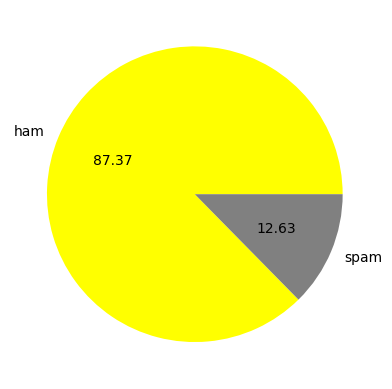

In [ ]:
plt.pie(df['Label'].value_counts(),labels=['ham','spam'],autopct="%0.2f",colors=['yellow','gray'])
plt.show()

### Language Processing

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['No of Characters'] = df['Text'].apply(len)
df['No of Words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['No of sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-70-5e1939f691a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No of Characters'] = df['Text'].apply(len)
<ipython-input-70-5e1939f691a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No of Words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
<ipython-input-70-5e1939f691a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
df.describe()

,No of Characters,No of Words,No of sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df['Label'] = df['Label'].replace({'spam': 1, 'ham': 0})

<ipython-input-75-8e1a846de877>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Label'].replace({'spam': 1, 'ham': 0})


In [ ]:
df[df['Label'] == 0][['No of Characters','No of Words','No of sentences']].describe()

,No of Characters,No of Words,No of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
 df[df['Label'] == 1][['No of Characters','No of Words','No of sentences']].describe()

,No of Characters,No of Words,No of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


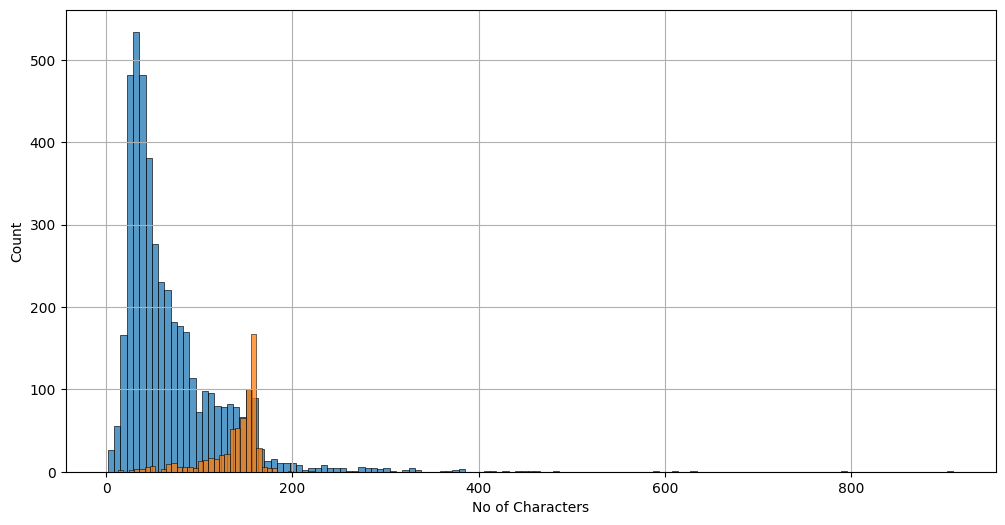

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['No of Characters'])
sns.histplot(df[df['Label'] == 1]['No of Characters'])
plt.grid()

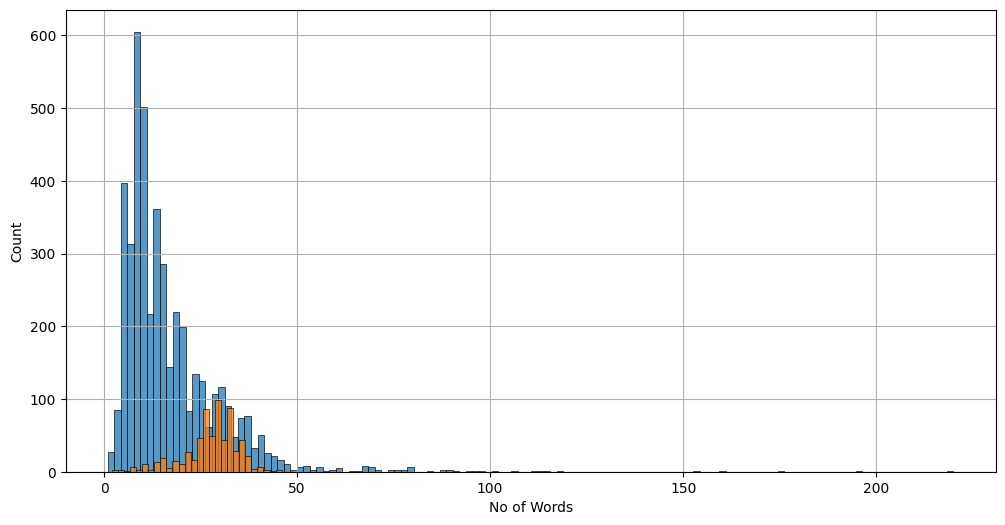

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['No of Words'])
sns.histplot(df[df['Label'] == 1]['No of Words'])
plt.grid()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

### Text to Preprocessed Text

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
df['transformed_text'] = df['Text'].apply(transform_text)

<ipython-input-84-88bf366627f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['Text'].apply(transform_text)


In [ ]:
df.head()

,Label,Text,No of Characters,No of Words,No of sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 4000)

In [ ]:
y = df['Label'].values

### Data Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 20)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

### Gaussian NB


In [ ]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred1 = GNB.predict(x_test)
gnb_score = accuracy_score(y_test,y_pred1)
print("Accuracy By Gaussian NB Model:",gnb_score*100)

Accuracy By Gaussian NB Model: 85.97678916827853


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       888
           1       0.50      0.83      0.63       146

    accuracy                           0.86      1034
   macro avg       0.74      0.85      0.77      1034
weighted avg       0.90      0.86      0.87      1034



### Multinomial NB

In [ ]:
MNB = MultinomialNB(alpha=1.0)
MNB.fit(x_train,y_train)
y_pred2 = MNB.predict(x_test)
mnb_score = accuracy_score(y_test,y_pred2)
print("Accuracy By Multinomial NB Model:",mnb_score*100)

Accuracy By Multinomial NB Model: 96.80851063829788


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       888
           1       1.00      0.77      0.87       146

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



### Bernoulli NB

In [ ]:
BNB = BernoulliNB()
BNB.fit(x_train,y_train)
y_pred3 = BNB.predict(x_test)
bnb_score = accuracy_score(y_test,y_pred3)
print("Accuracy By Bernoulli NB Model:",bnb_score*100)

Accuracy By Bernoulli NB Model: 97.77562862669245


In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       888
           1       0.98      0.86      0.92       146

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred4 = lg.predict(x_test)
lg_score = accuracy_score(y_test,y_pred4)
print("Accuracy By Logistic Regression Model:",lg_score*100)

Accuracy By Logistic Regression Model: 94.48742746615088


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       888
           1       0.97      0.63      0.76       146

    accuracy                           0.94      1034
   macro avg       0.96      0.81      0.87      1034
weighted avg       0.95      0.94      0.94      1034



### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred5 = svm.predict(x_test)
svm_score = accuracy_score(y_test,y_pred5)
print("Accuracy By SVM Model:",svm_score*100)

Accuracy By SVM Model: 96.0348162475822


In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       888
           1       0.98      0.73      0.84       146

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



###  Data Visualization

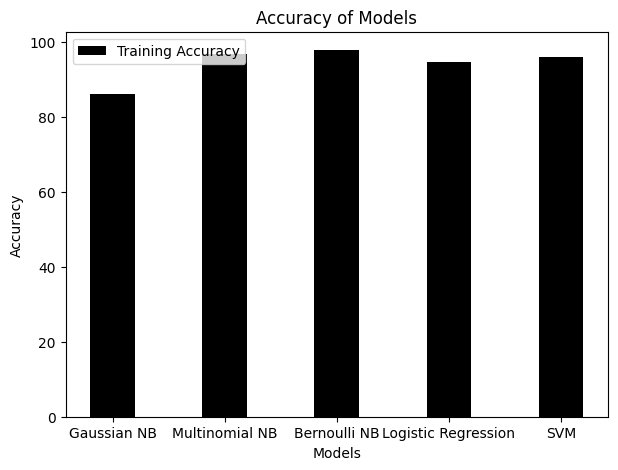

In [ ]:
model_names = ['Gaussian NB', 'Multinomial NB','Bernoulli NB','Logistic Regression','SVM']
train_accuracies = [gnb_score*100,mnb_score*100,bnb_score*100,lg_score*100,svm_score*100]
plt.figure(figsize=(7, 5))
plt.bar(model_names, train_accuracies, label='Training Accuracy', color = "black", width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.legend()
plt.show()